<a href="https://colab.research.google.com/github/ArpitKRS/Guess-the-clothing/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # for loading dataset
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data() # split the data into training and testing data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23] # gives the look of one pixel

194

Our pixel values are between 0 to 255, 0 being black and 255 being white

In [ ]:
train_labels[:10] # looking at first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Taking a look at some of these  images

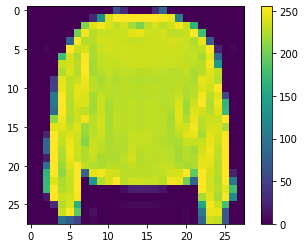

In [ ]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

Squishing data between 0 and 1 to make it more simpler

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Building a model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2) {128 is choosen as random as it is the half of total pixel value}
    keras.layers.Dense(10, activation='softmax') # output layer (3) {10 is choosen as it is the number of classes}
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.fit(train_images, train_labels, epochs=4) 

Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4961 - accuracy: 0.8258
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8633
Epoch 3/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3362 - accuracy: 0.8777
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8848


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3631 - accuracy: 0.8656
Test accuracy: 0.8655999898910522


In [ ]:
predictions = model.predict(test_images)
print(predictions)

[[3.3022854e-07 8.2526356e-08 2.6344441e-07 ... 3.4664456e-02
  2.8953498e-05 9.0184259e-01]
 [6.3485793e-05 2.1057014e-09 9.8051363e-01 ... 5.0284910e-10
  9.2332037e-08 3.4324538e-12]
 [3.4234420e-06 9.9999392e-01 5.9820565e-08 ... 2.1403337e-10
  1.6791491e-08 1.0336385e-10]
 ...
 [1.8354374e-03 9.5856416e-09 6.8996131e-04 ... 1.9775198e-06
  9.9643940e-01 3.0176945e-09]
 [1.5180731e-07 9.9997628e-01 6.5559393e-09 ... 5.4900662e-09
  7.7225017e-09 4.6923567e-09]
 [8.4459884e-05 5.7984573e-07 7.2841889e-05 ... 3.3376075e-02
  4.2211763e-03 2.6664307e-04]]
